In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
# note: when there is a % it is not really python, in this example we tell the system not to open another window when doing 
# matplotlib


In [2]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [3]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [4]:
# Part 1: Understanding Product Categories
# What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?
# Frequency Tables:
    # Generate a frequency table for the product category.
    # Which are the top 5 most listed product categories?

In [5]:
# Frequency table for 'category
frequency_table = df['category'].value_counts()

# Calculating the proportion of each unique value in the 'category'
proportion_table = df['category'].value_counts(normalize=True)

display(frequency_table)
proportion_table.round(2)




category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

category
Sports & Outdoors                         0.34
Beauty                                    0.01
Handmade Clothing, Shoes & Accessories    0.01
Bath & Body                               0.01
Birthday Gifts                            0.01
                                          ... 
Alexa Built-In Devices                    0.00
Motorbike Chassis                         0.00
Plugs                                     0.00
Smart Home Security & Lighting            0.00
Smart Speakers                            0.00
Name: proportion, Length: 296, dtype: float64

In [6]:
# Top 5 categories

frequency_table.sort_values(ascending=False)[:5]

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [7]:
# 2/ Visualizations:
    # Display the distribution of products across different categories using a bar chart. If you face problems understanding 
    # the chart, do it for a subset of top categories.
    # For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

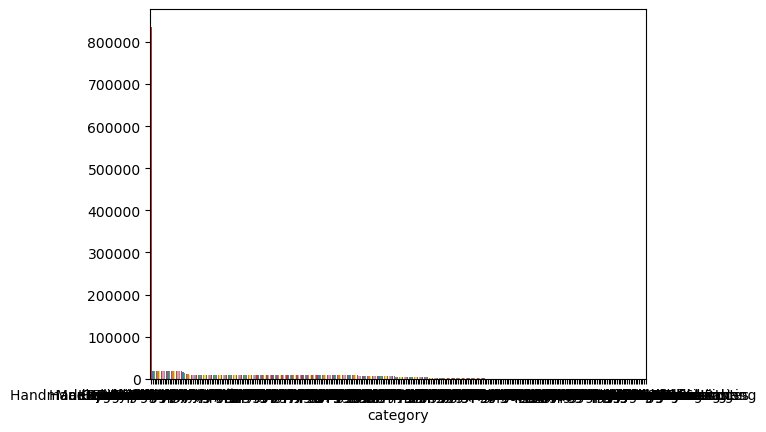

In [8]:
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set1" palette
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set1");
# Not very readable

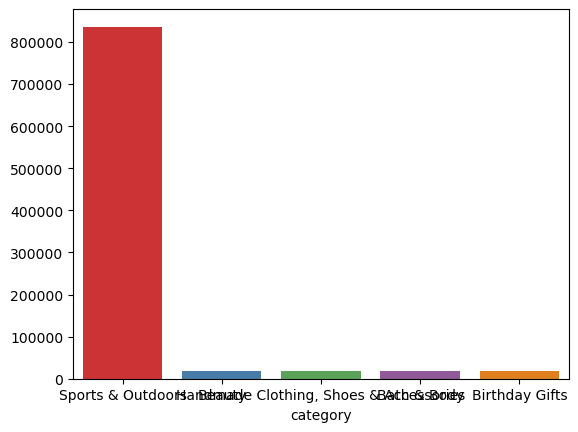

In [9]:
top_5 = ['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories', 'Bath & Body', 'Birthday Gifts']

# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set1" palette
sns.barplot(x=frequency_table[top_5].index, y=frequency_table[top_5].values, palette="Set1");
# Not very readable

<Axes: ylabel='count'>

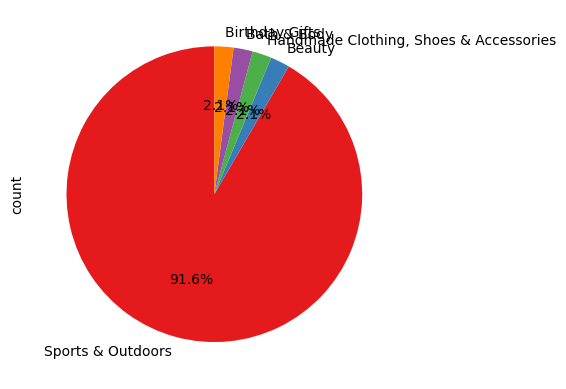

In [10]:
# Plotting a pie chart of the 'category' column value counts, with percentage labels, 
# starting at angle 90, and using colors from the "Set3" Seaborn palette
frequency_table[top_5].plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set1"))

In [11]:
# Sports & Outdoors is the most important one by far. Next is 2.1%

In [12]:
# Part 2: Delving into Product Pricing
    # Measures of Centrality:
        # Calculate the mean, median, and mode for the price of products.
        # What's the average price point of products listed? How does this compare with the most common price point (mode)?
# JAV:    average price = 89 
#         mode price = 9.99, very different, much lower than the average
#         median = 19.9
#         It seems the distribution is skewed right (outliers pulling the average towards the right... maxis 100K)
    
    # Measures of Dispersion:
        # Determine the variance, standard deviation, range, and interquartile range for product price.
        #How varied are the product prices? Are there any indicators of a significant spread in prices?
# JAV std dev and variance are high, respectively:  346 and 119445 !! => there is a large spread of data
# this was expected when we saw the distribution was very skewed; 75% are below 46 in price (below the mean that is at 89...)

In [13]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

display(mean_price, median_price, mode_price, variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price)
df['price'].describe()

89.24380943923663

19.09

9.99

119445.48532256528

345.60886175352226

0.0

100000.0

100000.0

0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [36]:
# 3/ Visualizations:
# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
# If its hard to read these diagrams, think why this is, and explain how it could be solved.
# Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread 
# and potential outliers in product pricing.

In [37]:
# sns.histplot(df['price'], kde=True, color="blue") => only few very expensive outliers

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000020FADC61EE0> (for post_execute):


KeyboardInterrupt: 

In [17]:
my_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, df['price'].max()] # we define the sizes of the bins
my_labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-110','110-120','120-130','130-140','140-150','150-160','160-170','170-180','180-190','190-200','above 200']
df['price_bins'] = pd.cut(df['price'], bins=my_bins, labels=my_labels, include_lowest=True)


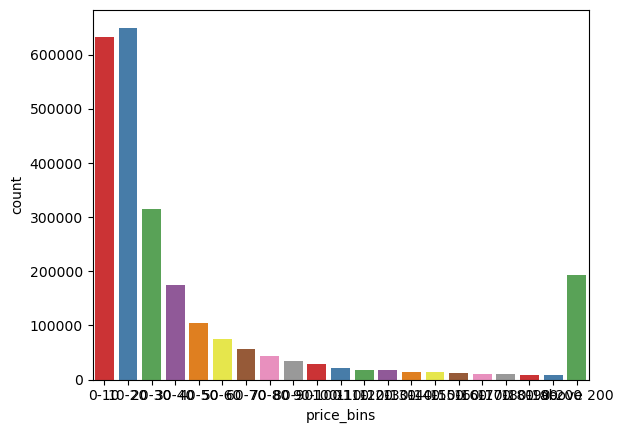

In [18]:
sns.countplot(data=df, x='price_bins', palette="Set1");

<Axes: >

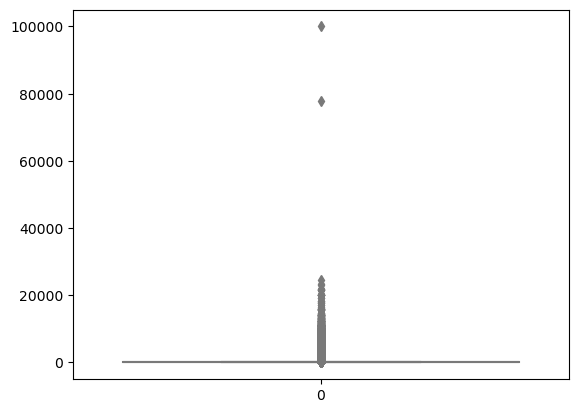

In [19]:
# Plotting a boxplot for the 'SalePrice' column with a light blue color
sns.boxplot(data = df['price'], color="lightblue") # We only see the outliers!!

In [ ]:
# Part 3: Unpacking Product Ratings
#    Measures of Centrality:
#      Calculate the mean, median, and mode for the rating of products.
# JAV: mode and median is at 0!!! so more than 50% of the buyers have not filled in the info... hence the 0 value by default
# JAV: the mean is at 2.15... so all the others that write a rating are probably high (4 or 5?)
#      How do customers generally rate products? Is there a common trend?
#    Measures of Dispersion:
#      Determine the variance, standard deviation, and interquartile range for product rating.
#      Are the ratings consistent, or is there a wide variation in customer feedback?
# JAV: the VAR is at 4.8... nearly the value of the range; std at 2.2... => there is a lot of variability due to the 0s but 
# likely less in the ones rated not 0

In [21]:
# Looking at the statistics of the stars (rating) column
mean_stars = df['stars'].mean()
median_stars = df['stars'].median()
mode_stars = df['stars'].mode()[0]
variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
min_stars = df['stars'].min()
max_stars = df['stars'].max()
range_stars = max_stars - min_stars
quantiles_stars = df['stars'].quantile([0.25, 0.5, 0.75])

print(f'mean= {mean_stars}, median= {median_stars}, mode= {mode_stars}')
print(f'var = {variance_stars}, std_dev = {std_dev_stars}, min = {min_stars}, max = {max_stars}, range = {range_stars}')
print(f'quantiles = {quantiles_stars}')
df['stars'].describe()


mean= 2.152836472966065, median= 0.0, mode= 0.0
var = 4.81743402976196, std_dev = 2.1948653785054697, min = 0.0, max = 5.0, range = 5.0
quantiles = 0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [22]:
# Proving that there is less variability in the ones rated not 0 
# Std dev is now 0.5! and the mean, median are close around 4.3-4.4

without_zeros = df['stars'] != 0
df['stars'][without_zeros].describe()

count    1.218010e+06
mean     4.319161e+00
std      5.552868e-01
min      1.000000e+00
25%      4.100000e+00
50%      4.400000e+00
75%      4.600000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [ ]:
# Shape of the Distribution:
    # Calculate the skewness and kurtosis for the rating column.
    # Are the ratings normally distributed, or do they lean towards higher or lower values?
    
# JAV: mode was at 0, like the median, the average was at +/-2.3 => we expected a skewed distribution, right (or positive) skewed
# JAV : negative kurtosis means the distribution is "flatter than the normal" and with less outliers (as expected as the range
# of the ratings is limited between 0 and 5)

In [23]:
skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()

skewness_stars, kurtosis_stars


(0.08120735761080985, -1.9260061280432985)

In [ ]:
# Visualizations:
# Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


<Axes: xlabel='stars', ylabel='Count'>

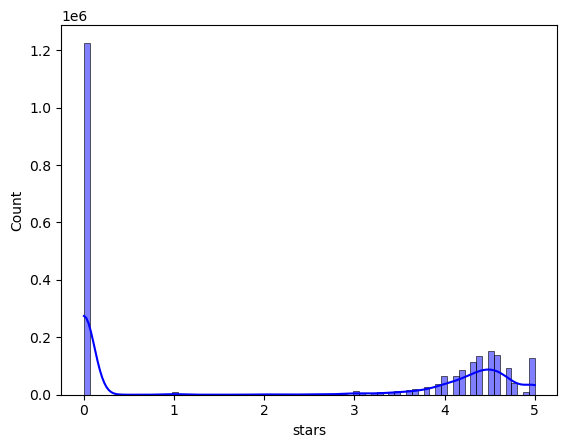

In [24]:
sns.histplot(df['stars'], kde=True, color="blue") # as expected, many zeros, and scores around 4.3-4.4

<Axes: xlabel='stars', ylabel='Count'>

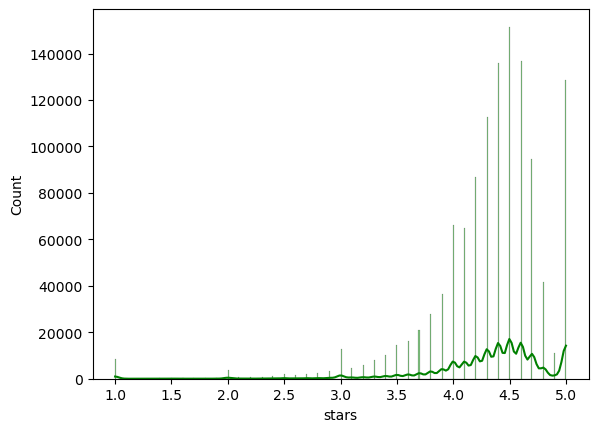

In [25]:
sns.histplot(df['stars'][without_zeros], kde=True, color="green") 

In [ ]:
# this distribution is 'more' normal with a high number of 5, that I would not consider as outliers, but the 1s or even below 3 
# would be.